In [121]:
%matplotlib inline

In [122]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sqlalchemy import create_engine
from config import DATABASE_URI

In [123]:
# Create connection to database
engine = create_engine(DATABASE_URI)
conn = engine.connect()

In [124]:
# Load salaries table from database
salaries_df = pd.read_sql("SELECT * FROM salaries", conn)
salaries_df.head()

,emp_no,salary
0,10001,60117
1,10002,65828
2,10003,40006
3,10004,40054
4,10005,78228


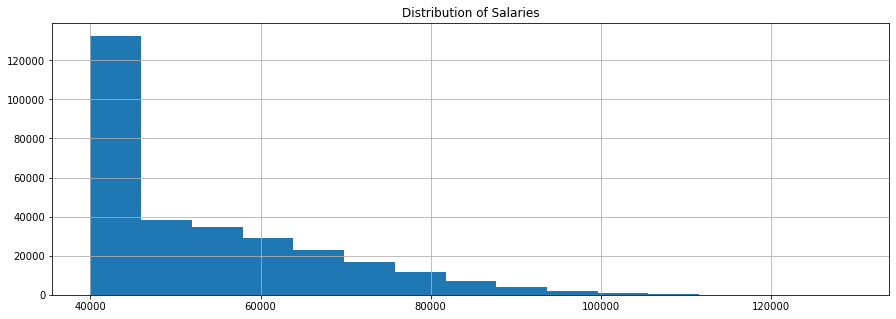

<Figure size 1080x360 with 0 Axes>

In [146]:
# Plot histogram of salaries
plt.rcParams['figure.figsize'] = [15, 5]
salaries_df['salary'].hist(bins = 15)
plt.title('Distribution of Salaries')
plt.savefig('salary_distribution.png')
plt.show()
plt.tight_layout()

In [126]:
# Load titles and employees tables
employees_df = pd.read_sql("SELECT * FROM employees", conn)
employees_df.head()

,emp_no,emp_title,birth_date,first_name,last_name,sex,hire_date
0,473302,s0001,1953-07-25,Hideyuki,Zallocco,M,1990-04-28
1,475053,e0002,1954-11-18,Byong,Delgrande,F,1991-09-07
2,57444,e0002,1958-01-30,Berry,Babb,F,1992-03-21
3,421786,s0001,1957-09-28,Xiong,Verhoeff,M,1987-11-26
4,282238,e0003,1952-10-28,Abdelkader,Baumann,F,1991-01-18


In [127]:
titles_df = pd.read_sql("SELECT * FROM titles", conn)
titles_df.head()

,title_id,titles
0,s0001,Staff
1,s0002,Senior Staff
2,e0001,Assistant Engineer
3,e0002,Engineer
4,e0003,Senior Engineer


In [128]:
# Select emp_no and emp title for merge with titles
employees_no_title = employees_df[['emp_no', 'emp_title']]
employees_no_title.head()

,emp_no,emp_title
0,473302,s0001
1,475053,e0002
2,57444,e0002
3,421786,s0001
4,282238,e0003


In [129]:
# Rename emp_title to title_id to match column in titles_df
employees_no_title = employees_no_title.rename(columns={'emp_title': 'title_id'})

In [130]:
# Merge titles_df and employees_no_title on title_id
emp_title_titles = pd.merge(titles_df, employees_no_title, on = 'title_id')
emp_title_titles.head()

,title_id,titles,emp_no
0,s0001,Staff,473302
1,s0001,Staff,421786
2,s0001,Staff,273487
3,s0001,Staff,246449
4,s0001,Staff,48085


In [131]:
# Merge emp_title_titles and salaries_df on emp_no to obtain salaries of each title
title_salary = pd.merge(salaries_df, emp_title_titles, on = 'emp_no')
title_salary.head()

,emp_no,salary,title_id,titles
0,10001,60117,e0003,Senior Engineer
1,10002,65828,s0001,Staff
2,10003,40006,e0003,Senior Engineer
3,10004,40054,e0003,Senior Engineer
4,10005,78228,s0001,Staff


## Bar chart of Average Salary by Title 

In [132]:
# Create a groupby object of titles
titles_group = title_salary.groupby('titles')
# Average Salary by group
mean_salary_group = titles_group['salary'].mean()
mean_salary_group

titles
Assistant Engineer    48564.434447
Engineer              48535.336511
Manager               51531.041667
Senior Engineer       48506.799871
Senior Staff          58550.172704
Staff                 58465.382850
Technique Leader      48582.896092
Name: salary, dtype: float64

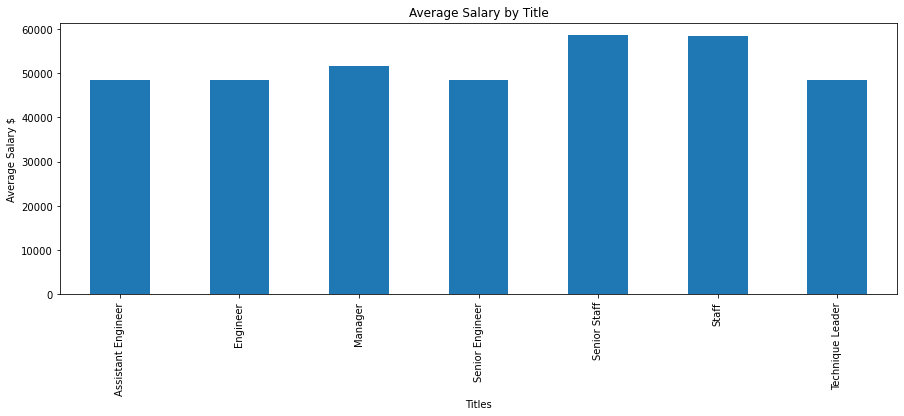

<Figure size 1080x360 with 0 Axes>

In [147]:
# Plot the graph
plt.rcParams['figure.figsize'] = [15, 5]
mean_salary_group_chart = mean_salary_group.plot(kind = 'bar', title = 'Average Salary by Title')
mean_salary_group_chart.set_xlabel('Titles')
mean_salary_group_chart.set_ylabel('Average Salary $')

plt.savefig('titles_salary.png')
plt.show()
plt.tight_layout()